<a href="https://colab.research.google.com/github/FIROZ-N/DSA-2025/blob/main/Python_Case_Study_Earthquakes_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
import pandas as pd

df = pd.read_csv("mn.csv")
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [379]:
print("Number of Records : ", df.shape[0])

Number of Records :  10081


In [380]:
print("Unique Location : ", df['locationSource'].unique())

Unique Location :  ['ak' 'nc' 'tx' 'pr' 'us' 'ci' 'hv' 'uw' 'av' 'mb' 'ok' 'nn' 'uu' 'se'
 'nm']


In [381]:
print(df.head(5))

                       time   latitude   longitude    depth   mag magType  \
0  2025-09-20T05:09:10.338Z  62.030600 -148.745200  17.7000  2.10      ml   
1  2025-09-20T05:07:49.940Z  38.825832 -122.806168   2.9600  0.88      md   
2  2025-09-20T05:05:21.740Z  32.436000 -101.378000   3.6435  1.00      ml   
3  2025-09-20T05:03:02.960Z  38.791668 -122.776169   1.2700  1.57      md   
4  2025-09-20T04:59:19.920Z  17.977833  -67.878333  45.5200  3.25      md   

    nst    gap      dmin   rms  ...                   updated  \
0   NaN    NaN       NaN  0.54  ...  2025-09-20T05:10:52.198Z   
1   9.0  140.0  0.003903  0.01  ...  2025-09-20T05:32:18.070Z   
2   8.0   99.0  0.000000  0.40  ...  2025-09-20T05:08:00.521Z   
3  26.0   79.0  0.009305  0.04  ...  2025-09-20T05:37:21.097Z   
4  12.0  210.0  0.716300  0.57  ...  2025-09-20T05:18:19.960Z   

                               place        type horizontalError depthError  \
0   28 km N of Sutton-Alpine, Alaska  earthquake             NaN   

In [382]:
df["time"] = pd.to_datetime(df['time'])
print(df['time'].head(5))

0   2025-09-20 05:09:10.338000+00:00
1   2025-09-20 05:07:49.940000+00:00
2   2025-09-20 05:05:21.740000+00:00
3   2025-09-20 05:03:02.960000+00:00
4   2025-09-20 04:59:19.920000+00:00
Name: time, dtype: datetime64[ns, UTC]


In [383]:
df.dropna(subset = ['latitude'])
print(df.shape[0])

10081


In [384]:
dr = df.columns[df.isnull().any()]
print("Empty Cols : ", dr)

Empty Cols :  Index(['mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError',
       'magError', 'magNst'],
      dtype='object')


In [385]:
df.columns[df.dropna().isnull().any()]
print(df.shape[0])

10081


In [386]:
lo = df.dropna(subset=['longitude'])

In [387]:
mg = df.dropna(subset = ['mag'])

In [388]:
hm = df[df['mag'] >= 4.0]
print(hm[['mag', 'time', 'place']].head(5))

    mag                             time  \
5   4.9 2025-09-20 04:46:34.067000+00:00   
9   4.8 2025-09-20 04:12:40.047000+00:00   
18  5.3 2025-09-20 02:47:49.764000+00:00   
21  4.8 2025-09-20 02:39:48.869000+00:00   
30  5.0 2025-09-20 01:28:37.039000+00:00   

                                           place  
5                 122 km SE of Miyakojima, Japan  
9   191 km E of Petropavlovsk-Kamchatsky, Russia  
18   74 km E of Petropavlovsk-Kamchatsky, Russia  
21           227 km SE of Sarangani, Philippines  
30           261 km S of Severo-Kuril’sk, Russia  


In [389]:
df["day_of_week"] = df['time']
print(df['day_of_week'].head(5))
print(df.columns)

0   2025-09-20 05:09:10.338000+00:00
1   2025-09-20 05:07:49.940000+00:00
2   2025-09-20 05:05:21.740000+00:00
3   2025-09-20 05:03:02.960000+00:00
4   2025-09-20 04:59:19.920000+00:00
Name: day_of_week, dtype: datetime64[ns, UTC]
Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'day_of_week'],
      dtype='object')


In [390]:
def get_sev(mag):
  if mag < 4.0:
    return "Low"
  elif mag < 6.0:
    return "High"
  else:
    return "Extrem"

df['severity_level'] = df['mag'].apply(get_sev)

print(df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'day_of_week', 'severity_level'],
      dtype='object')


In [391]:
print(df[['place', 'mag', 'severity_level']].head(5))

                               place   mag severity_level
0   28 km N of Sutton-Alpine, Alaska  2.10            Low
1        7 km NNW of The Geysers, CA  0.88            Low
2        16 km NNW of Coahoma, Texas  1.00            Low
3         2 km NW of The Geysers, CA  1.57            Low
4  73 km W of Pole Ojea, Puerto Rico  3.25            Low


In [392]:
cnt = df.groupby('place').size()
print(cnt.head(5))

place
0 km  of The Geysers, CA           1
0 km ENE of Minco, Oklahoma        2
0 km ENE of The Geysers, CA        1
0 km ESE of Indios, Puerto Rico    1
0 km ESE of Minco, Oklahoma        2
dtype: int64


In [393]:
avg_mg = df['mag'].mean()
print("Avg Mag : ", avg_mg)

Avg Mag :  1.4209563492103174


In [394]:
ds = df.groupby("time").agg({
    'mag': 'mean',
    'depth': 'max'
})
print(df)

                                  time   latitude   longitude     depth   mag  \
0     2025-09-20 05:09:10.338000+00:00  62.030600 -148.745200   17.7000  2.10   
1     2025-09-20 05:07:49.940000+00:00  38.825832 -122.806168    2.9600  0.88   
2     2025-09-20 05:05:21.740000+00:00  32.436000 -101.378000    3.6435  1.00   
3     2025-09-20 05:03:02.960000+00:00  38.791668 -122.776169    1.2700  1.57   
4     2025-09-20 04:59:19.920000+00:00  17.977833  -67.878333   45.5200  3.25   
...                                ...        ...         ...       ...   ...   
10076 2025-08-21 06:01:16.030000+00:00  35.890500 -117.690833    4.2000  0.69   
10077 2025-08-21 05:57:08.132000+00:00  15.651200  145.924900  112.6930  4.50   
10078 2025-08-21 05:48:31.930000+00:00  36.708500 -121.305333    8.1900  1.34   
10079 2025-08-21 05:43:49.230000+00:00  39.353333 -123.241667    6.8100  1.74   
10080 2025-08-21 05:41:08.656000+00:00  32.400000 -102.134000    6.3232  0.60   

      magType   nst    gap 

In [395]:
df.to_csv("cleaned_earthquakes.csv", index=False)
print("file saved !")

file saved !


In [396]:
import sqlite3 as sql
import pandas as pd

df = pd.read_csv("cleaned_earthquakes.csv")

conn = sql.connect("eq.db")
df.to_sql("eq", conn, if_exists="replace", index=False)
print("Test ok")

dd = pd.read_sql("select * from eq", conn)
print(dd.columns)
conn.close()

Test ok
Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'day_of_week', 'severity_level'],
      dtype='object')


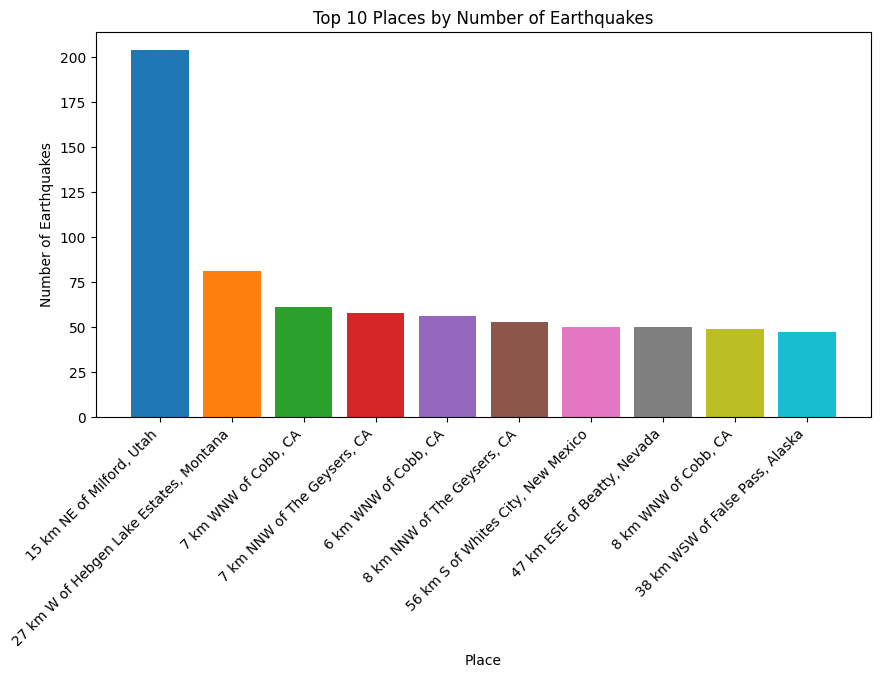

In [397]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_earthquakes.csv")

# Count earthquakes per place
place_counts = df.groupby('place').size().reset_index(name='count').sort_values(by='count', ascending=False)
top_places = place_counts.head(10)

# Different colors
colors = plt.cm.tab10.colors  # 10 distinct colors

plt.figure(figsize=(10,5))
plt.bar(top_places['place'], top_places['count'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Place')
plt.ylabel('Number of Earthquakes')
plt.title('Top 10 Places by Number of Earthquakes')
plt.show()


[2025-09-20T08:24:57.772+0000] {category.py:224} INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-09-20T08:24:57.774+0000] {category.py:224} INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


/tmp/ipython-input-817815795.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['time'].dt.to_period('W')


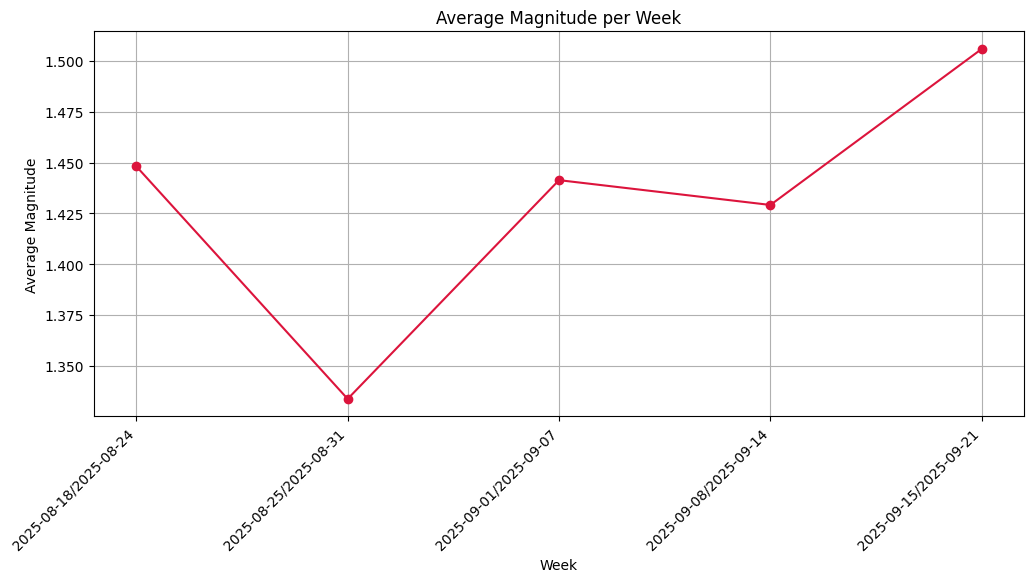

In [398]:
# Convert datetime safely
df['time'] = pd.to_datetime(df['time'], utc=True, errors='coerce')
df['week'] = df['time'].dt.to_period('W')

# Average magnitude per week
weekly_avg = df.groupby('week')['mag'].mean().reset_index()
weekly_avg['week'] = weekly_avg['week'].astype(str)

# Plot
plt.figure(figsize=(12,5))
plt.plot(weekly_avg['week'], weekly_avg['mag'], marker='o', color='crimson')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Week')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude per Week')
plt.grid(True)
plt.show()


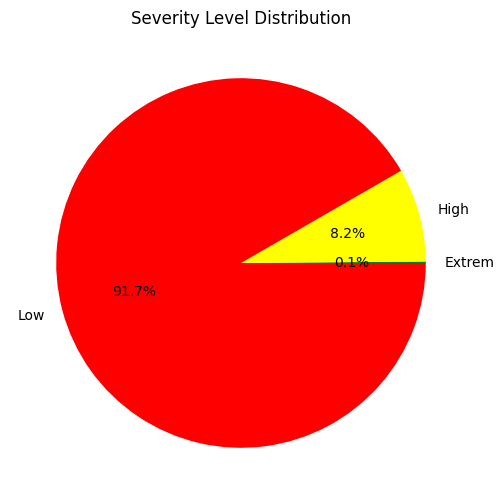

In [399]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("cleaned_earthquakes.csv")

# Count earthquakes per severity level
severity_counts = df.groupby('severity_level').size().reset_index(name='count')

# Assign 3 colors
colors = ['green', 'yellow', 'red']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(severity_counts['count'], labels=severity_counts['severity_level'],
        autopct='%1.1f%%', colors=colors)
plt.title('Severity Level Distribution')
plt.show()


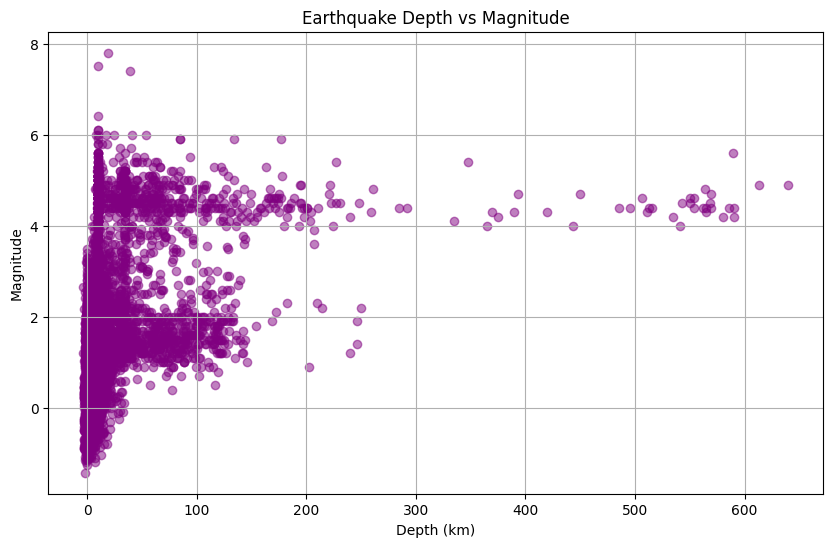

In [400]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_earthquakes.csv")

plt.figure(figsize=(10,6))
plt.scatter(df['depth'], df['mag'], c='purple', alpha=0.5)
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Earthquake Depth vs Magnitude')
plt.grid(True)
plt.show()


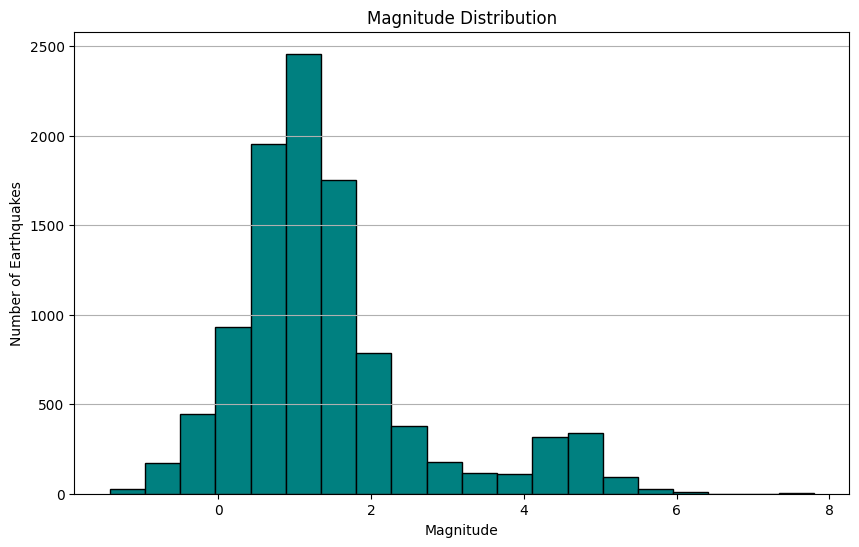

In [401]:
plt.figure(figsize=(10,6))
plt.hist(df['mag'], bins=20, color='teal', edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.title('Magnitude Distribution')
plt.grid(axis='y')
plt.show()


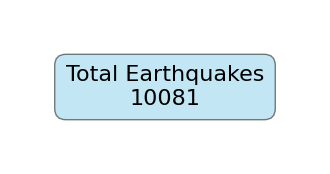

In [402]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_earthquakes.csv")

total_eq = len(df)

plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, f"Total Earthquakes\n{total_eq}", fontsize=16, ha='center', va='center',
         bbox=dict(facecolor='skyblue', alpha=0.5, boxstyle='round,pad=0.5'))
plt.axis('off')
plt.show()


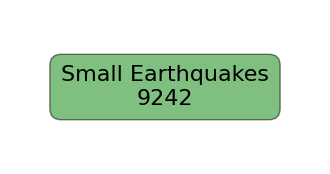

In [403]:
small_eq = len(df[df['mag'] < 4.0])

plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, f"Small Earthquakes\n{small_eq}", fontsize=16, ha='center', va='center',
         bbox=dict(facecolor='green', alpha=0.5, boxstyle='round,pad=0.5'))
plt.axis('off')
plt.show()


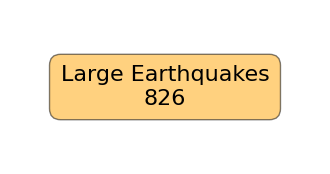

In [404]:
large_eq = len(df[(df['mag'] >= 4.0) & (df['mag'] < 6.0)])

plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, f"Large Earthquakes\n{large_eq}", fontsize=16, ha='center', va='center',
         bbox=dict(facecolor='orange', alpha=0.5, boxstyle='round,pad=0.5'))
plt.axis('off')
plt.show()


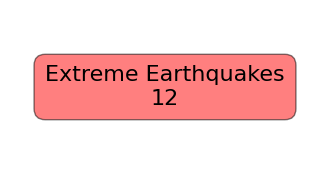

In [405]:
extreme_eq = len(df[df['mag'] >= 6.0])

plt.figure(figsize=(4,2))
plt.text(0.5, 0.5, f"Extreme Earthquakes\n{extreme_eq}", fontsize=16, ha='center', va='center',
         bbox=dict(facecolor='red', alpha=0.5, boxstyle='round,pad=0.5'))
plt.axis('off')
plt.show()


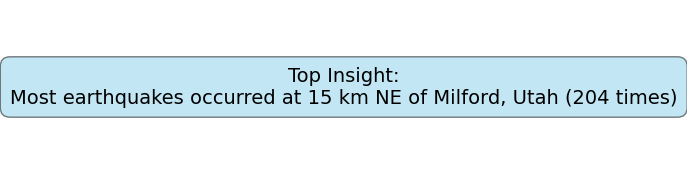

In [406]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_earthquakes.csv")

# Find the place with the most earthquakes
top_place = df['place'].value_counts().idxmax()
top_count = df['place'].value_counts().max()

# Plot card
plt.figure(figsize=(6,2))
plt.text(0.5, 0.5, f"Top Insight:\nMost earthquakes occurred at {top_place} ({top_count} times)",
         fontsize=14, ha='center', va='center',
         bbox=dict(facecolor='skyblue', alpha=0.5, boxstyle='round,pad=0.5'))
plt.axis('off')
plt.show()
